# Clustering Grocery Items

## Goal

Online shops often sell tons of different items and this can become messy very quickly!

Data science can be extremely useful to automatically organize the products in categories so that they can be easily found by the customers.

The goal of this challenge is to look at user purchase history and create categories of items that are likely to be bought together and, therefore, should belong to the same cluster.

## Challenge Description

Company XYZ is an online grocery store. In the current version of the website, they have manually grouped the items into a few categories based on their experience.

However, they now have a lot of data about user purchase history. Therefore, they would like to put the data into use!

This is what they asked you to do:

- The company founder wants to meet with some of the best customers to go through a focus group with them. You are asked to send the ID of the following customers to the founder:


        the customer who bought the most items overall in her lifetime

        for each item, the customer who bought that product the most

- Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

09_Clustering_Grocery _Items.ipynb  purchase_history.csv
item_to_id.csv


In [3]:
df_item = pd.read_csv('item_to_id.csv')
df_item.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [4]:
#pd.set_option('display.max_columns', None)

df_purchase = pd.read_csv('purchase_history.csv')
df_purchase.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [5]:
# There are totally 48 items

print(df_item.shape)
print(df_purchase.shape)

(48, 2)
(39474, 2)


In [6]:
columns = list(np.arange(1,49))
columns = ['user_id']+columns

In [7]:
#for i in range(df_purchase.shape[0]):
    #dict = {}
    #dict['user_id'] = [df_purchase.user_id[i]]
    #for j in range(1,49):
        #dict[j] = [0]
    #df2 = pd.DataFrame(dict, columns = columns)
    #df = df.append(df2)
    
    #if (i% 1000) == 0: print(i)

In [8]:
def id_to_item(df):
    ids = df['id'].str.split(',').sum()
    id_list = [0 for i in range(1, 49)]
    for i in ids:
        id_list[int(i) - 1] += 1
    return pd.Series(id_list, index=list(range(1, 49)))

In [9]:
df = df_purchase.groupby('user_id').apply(id_to_item)

In [10]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
df_count1 = df.sum(axis=1).reset_index().rename(columns={0:'count'})
df_count1.sort_values('count',ascending = False).head(10)

,user_id,count
4445,269335,72
6111,367872,70
6623,397623,64
9918,599172,64
6291,377284,63
24621,1485538,62
15193,917199,62
11898,718218,60
10799,653800,60
22152,1341188,58


This is the top 10 user_id to buy stuff. Now I count the total buys of each item.

In [12]:
df_count2 = df.sum().reset_index().rename(columns={'index': 'Item_id',0:'count'})
df_count2 = pd.merge(df_item,df_count2, how = 'left', on = 'Item_id')
df_count2.sort_values('count',ascending = False)

,Item_name,Item_id,count
35,lettuce,2,14473
18,sugar,1,9119
34,cucumbers,42,9050
28,cherries,25,9019
30,apples,32,9008
31,broccoli,44,8980
29,grapefruit,20,8951
26,bananas,46,8921
33,cauliflower,45,8902
27,berries,40,8878


In [13]:
for i in range(1,49):
    result = list(df[df[i] == df[i].max()].index.values)
    print(i,[result])

1 [[31625, 68836, 540483, 1091637, 1301034]]
2 [[31625, 269335]]
3 [[154960, 593439, 1147269, 1433188]]
4 [[5289, 73071, 432842]]
5 [[217277, 397623, 414416, 1392068]]
6 [[334664, 1151741]]
7 [[175865, 312711, 360336, 811299, 1147990, 1494252]]
8 [[151926, 238761, 269836, 297980, 300878, 423287, 478446, 489063, 540483, 578216, 587316, 722795, 723012, 765161, 851688, 914267, 973683, 1054361, 1119944, 1168773, 1238470, 1264074, 1274438, 1374100, 1419565, 1433188, 1451339, 1485538]]
9 [[269335, 397623, 1271258, 1310896]]
10 [[618914, 743501, 1485538]]
11 [[367872, 534745, 1038694, 1198106, 1249050, 1435298]]
12 [[557904, 791038]]
13 [[653800, 820788]]
14 [[172120, 238761, 255458, 279962, 318112, 380900, 384935, 395775, 489063, 490181, 544364, 554479, 718218, 764759, 884172, 951844, 993496, 1054816, 1091106, 1227423, 1374100]]
15 [[143741]]
16 [[73071, 90642, 189005, 319296, 491729, 545108, 745575, 837807, 888933, 920036, 1064792, 1169085, 1374867, 1406663, 1464442]]
17 [[366155, 463073, 1

In [14]:
result = []
for i in range(1,49):
    buyers = list(df[df[i] == df[i].max()].index.values)
    result.append(buyers)

In [15]:
df_buyers = pd.DataFrame({'Item_id':list(range(1,49)),'top_buyers':result})
df_buyers = pd.merge(df_buyers,df_item, how = 'left', on = 'Item_id')
df_buyers

,Item_id,top_buyers,Item_name
0,1,"[31625, 68836, 540483, 1091637, 1301034]",sugar
1,2,"[31625, 269335]",lettuce
2,3,"[154960, 593439, 1147269, 1433188]",pet items
3,4,"[5289, 73071, 432842]",baby items
4,5,"[217277, 397623, 414416, 1392068]",waffles
5,6,"[334664, 1151741]",poultry
6,7,"[175865, 312711, 360336, 811299, 1147990, 1494...",sandwich bags
7,8,"[151926, 238761, 269836, 297980, 300878, 42328...",butter
8,9,"[269335, 397623, 1271258, 1310896]",soda
9,10,"[618914, 743501, 1485538]",carrots


## Clustering

Use PCA and KMeans to reduce dimensions. 

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [17]:
df_cluster = df.T

In [18]:
# PCA for dimension reduction
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(df_cluster)
pca_feature = pca.transform(df_cluster)

In [19]:
pca_feature

array([[ 18.14562527,  -2.48597703],
       [ 75.94301117, -31.47060996],
       [  3.3409709 ,  -2.10547846],
       [-25.66783708,  -2.35034891],
       [-29.6682334 ,  -2.36844687],
       [ 15.49480874,  -0.25936031],
       [-26.86062487,  -2.36924791],
       [-11.70762808,  -3.3094558 ],
       [ 17.43146206,   5.01287113],
       [ 22.63158263, -25.18650308],
       [-29.9197811 ,  -2.06185976],
       [-27.52948108,  -3.81434678],
       [ 16.32144643,  -5.40532067],
       [-11.87863922,  -1.51945744],
       [-27.3297905 ,  -2.74063296],
       [-10.91720149,  -1.27353006],
       [ 15.01611238,  -0.75966528],
       [ -8.14263215,  -0.99204186],
       [-26.792324  ,  -2.1621787 ],
       [ 19.77694458,  40.23539582],
       [-12.08211186,  -2.86282617],
       [ -8.18030376,  -0.58813619],
       [ 16.40046741,   3.51402868],
       [-26.22313607,  -2.09088747],
       [ 20.30714798,  38.83753863],
       [ -5.30021809,  -1.38369501],
       [ -8.27702821,   0.49183745],
 

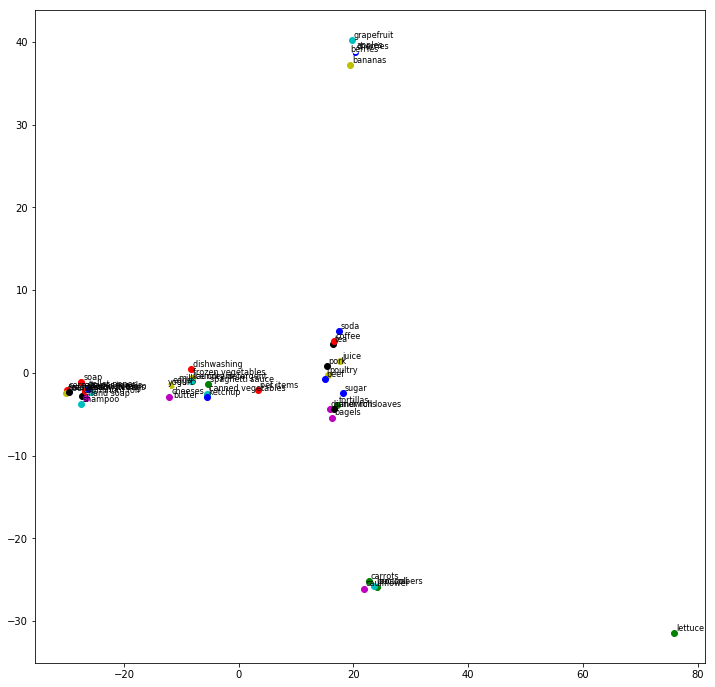

In [20]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(12, 12))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[j % 8])
    name = df_item[df_item['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.3, y+0.3), s=name.values[0], fontsize=8)

plt.show()

In [21]:
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=42, n_jobs=-1)
kmeans = kmeans.fit(df_cluster)
label = kmeans.predict(df_cluster)

In [22]:
len(label)

48

In [23]:
items = list(df_buyers.Item_name.unique())
items

['sugar',
 'lettuce',
 'pet items',
 'baby items',
 'waffles',
 'poultry',
 'sandwich bags',
 'butter',
 'soda',
 'carrots',
 'cereals',
 'shampoo',
 'bagels',
 'eggs',
 'aluminum foil',
 'milk',
 'beef',
 'laundry detergent',
 'shaving cream',
 'grapefruit',
 'cheeses',
 'frozen vegetables',
 'tea',
 'paper towels',
 'cherries',
 'spaghetti sauce',
 'dishwashing\xa0',
 'canned vegetables',
 'hand soap',
 'flour',
 'pasta',
 'apples',
 'toilet paper',
 'tortillas',
 'soap',
 'ice cream',
 'dinner rolls',
 'juice',
 'sandwich loaves',
 'berries',
 'ketchup',
 'cucumbers',
 'coffee',
 'broccoli',
 'cauliflower',
 'bananas',
 'pork',
 'yogurt']

In [24]:
dict = {}
for i in range(0,48):
    #print(label[i],dict)
    if label[i] not in dict:
        dict[label[i]] = [items[i]]
    else:
        dict[label[i]].append(items[i])
        
for i, j in dict.items():
    print("cluster: ", i, j)

cluster:  11 ['sugar']
cluster:  4 ['lettuce']
cluster:  2 ['pet items', 'baby items', 'waffles', 'sandwich bags', 'butter', 'cereals', 'shampoo', 'eggs', 'aluminum foil', 'milk', 'laundry detergent', 'shaving cream', 'cheeses', 'paper towels', 'spaghetti sauce', 'dishwashing\xa0', 'canned vegetables', 'hand soap', 'flour', 'pasta', 'toilet paper', 'soap', 'ice cream', 'ketchup', 'cauliflower', 'yogurt']
cluster:  5 ['poultry', 'beef', 'pork']
cluster:  3 ['soda', 'juice']
cluster:  1 ['carrots', 'broccoli']
cluster:  7 ['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
cluster:  6 ['grapefruit', 'cherries', 'apples', 'bananas']
cluster:  0 ['frozen vegetables']
cluster:  9 ['tea', 'coffee']
cluster:  8 ['berries']
cluster:  10 ['cucumbers']
